<a href="https://colab.research.google.com/github/jihye-kim11/AI_project/blob/master/game_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 그래도 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

1.지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

2.연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

3.매출이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

```
Section 1때 배운 내용들은 다음과 같습니다.

Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
Sprint 2 : Hypothesis Test, CI, Bayesian
Sprint 3 : DR, PCA, Cluster
```


```
Name : 게임의 이름입니다.
Platform : 게임이 지원되는 플랫폼의 이름입니다.
Year : 게임이 출시된 연도입니다.
Genre : 게임의 장르입니다.
Publisher : 게임을 제작한 회사입니다.
NA_Sales : 북미 매출액입니다.
EU_Sales : 유럽 매출액입니다.
JP_Sales : 일본 매출액입니다.
Other_Sales : 기타지역 매출액입니다.
```



In [ ]:
#지역에 따라 선호하는 게임 장르가 다를까: Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales 
#연도별 게임의 트렌드 있을까:Year, Genre
#매출이 높은 게임에 대한 분석 및 시각화 프로세스

# **0.데이터 전처리**

플랫폼/장르/년도/판매액 전처리 완료. 추가적으로 가정용/휴대용 구분하고, 회사 구분 

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [ ]:
data1='https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
import pandas as pd
df=pd.read_csv(data1)
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

데이터 계산을 위해 float으로 판매 값 수정('M'단위로 통일)

In [ ]:
def tofloat(str):#K는 *1000 M은 * 1000000이므로 M을 기준으로 k는 /1000해준다.
  if 'K' in str:
    str=float(str.replace('K',''))
    str/=1000
  elif 'M' in str:
    str=str.replace('M','')
  return float(str)

df['NA_Sales']= df['NA_Sales'].apply(tofloat)
df['EU_Sales']= df['EU_Sales'].apply(tofloat)
df['JP_Sales']= df['JP_Sales'].apply(tofloat)
df['Other_Sales']= df['Other_Sales'].apply(tofloat)


Year값을 전처리해준다.(97->1997,15->2015와 같이)

In [ ]:
def toyear(data):
  if data<50:
    data+=2000
  elif data<100:
    data+=1900
  return data
df['Year']=df['Year'].apply(toyear)

In [ ]:
df.sort_values(by=['Name'], axis=0, inplace=True)
df=df.reset_index(drop=True)

In [ ]:
for i in range(len(df)-1):
  if df['Name'][i]==df['Name'][i+1] and df['Platform'][i]==df['Platform'][i+1] and df['Genre'][i]==df['Genre'][i+1] and df['Publisher'][i]==df['Publisher'][i+1]:
     print(df[i:i+2])

                             Name Platform  ...  JP_Sales Other_Sales
9621  Need for Speed: Most Wanted       PC  ...       0.0        0.02
9622  Need for Speed: Most Wanted       PC  ...       0.0        0.05

[2 rows x 9 columns]
                              Name Platform  ...  JP_Sales Other_Sales
15939  Wii de Asobu: Metroid Prime      Wii  ...      0.02         0.0
15940  Wii de Asobu: Metroid Prime      Wii  ...      0.02         0.0

[2 rows x 9 columns]


In [ ]:
df=df.drop(15940,axis=0)
df=df.drop(9621,axis=0)

In [ ]:
len(df)

16596

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03
1,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
2,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00
4,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
...,...,...,...,...,...,...,...,...,...
16593,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0.00,0.20
16594,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.00,0.00
16595,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.08,0.09,0.00,0.02
16596,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41


In [ ]:
df['t_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

지역에 따라 선호하는 게임 장르와 플랫폼

In [ ]:
print("게임 장르: ",len(df['Genre'].unique()))
print(df['Genre'].unique())
print("게임 플랫폼: ",len(df['Platform'].unique()))
print(df['Platform'].unique(),len(df['Platform'].unique()))

게임 장르:  13
['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter' nan]
게임 플랫폼:  31
['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 31


게임의 장르는 12개가 존재한다.

게임의 플랫폼은 31개가 존재한다. 



```
Nintendo
NES:닌텐도 패미컴 1983년 가정용
SNES:닌텐도 슈퍼 패미컴 1990년 가정용
GB: 닌텐도 게임보이 1990년 휴대용
N64:닌텐도 64 1996년 가정용
GBA:닌텐도 게임보이 시리즈 후속 2001년 휴대용
GC: 닌텐도 게임큐브 2001년 가정용
DS:닌텐도 DS 2004년 휴대용
3DS:닌텐도 3DS 2011년 휴대용
Wii:닌텐도 Wii 2006년 가정용
WiiU:닌텐도 WiiU 2012년가정용

Sony(Playstation)
PSP:플레이스테이션 포터블 2004년 휴대용
PSV:플레이스테이션 Vita 2011년 휴대용
PS:플레이스테이션 1994년
PS2:플레이스테이션2 2000년
PS3:플레이스테이션3 2006년
PS4:플레이스테이션4

SEGA
GEN: SEGA Genesis 1989년 가정용
SCD: 세가 메가 CD 1991년 가정용
SAT: 세가 새턴 1994년 가정용
DC:세가 드림캐스트 1998년 가정용
GC: 세가 게임 기어 1994년 가정용

마이크로소프트(Xbox)
XB: 엑스박스 2001년 가정용
X360: 엑스박스 360 2005년 가정용
XOne:엑스박스 원 2013년

3DO 컴퍼니
3DO: 3DO 인터랙티브 멀티플레이어 1993년 가정용

NEC
TG16: turgobrafx-16 1987년 가정용
PCFX: PC-FX 1994년 가정용

Bandai
WG:원더스완 1999년 휴대용

Atari
2600:아타리 1977년 가정용

SNK
NG:네오 지오 1990년 가정용(대형 아케이드)

PC:컴퓨터
```






플랫폼은 다음과 같이 가정용,휴대용으로 구분되고 각 회사별로 구분된다. 이를 구분하기 위해 새로운 변수를 추가한다.

In [ ]:
use = {'GB':'portable', 'GBA':'portable', 'DS':'portable', '3DS':'portable', 'PSP':'portable', 'PSV':'portable',
                 'WS':'portable', 'GG':'portable', 'NES':'family', 'SNES':'family', 'N64':'family', 'GC':'family',
                 'Wii':'family','WiiU':'family','PS':'family','PS2':'family','PS3':'family','PS4':'family','2600':'family',
                 'XB':'family','X360':'family','XOne':'family','GEN':'family','SCD':'family','SAT':'family',
                 'DC':'family', 'NG':'family', 'TG16':'family', 'PCFX':'family', '3DO':'family', 'PC':'family'}

In [ ]:
company = {'NES':'Nintendo', 'SNES':'Nintendo', 'GB':'Nintendo', 'N64':'Nintendo', 'GBA':'Nintendo', 'GC':'Nintendo',
                'DS':'Nintendo', '3DS':'Nintendo', 'Wii':'Nintendo', 'WiiU':'Nintendo',
                'PSP':'Sony', 'PSV':'Sony', 'PS':'Sony', 'PS2':'Sony', 'PS3':'Sony','PS4':'Sony',
                'XB':'Microsoft', 'X360':'Microsoft', 'XOne':'Microsoft',
                '2600':'Atari', 'GEN':'Sega', 'SCD':'Sega','SAT':'Sega','DC':'Sega','GG':'Sega',
                'WS':'Bandai','NG':'SNK','TG16':'Nec', 'PCFX':'Nec', '3DO':'3DO', 'PC':'PC'
                }

In [ ]:
#df['Use']=df['Platform'].map(use)
df['P_Company']=df['Platform'].map(company)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,t_Sales,P_Company
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04,Nintendo
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,Nintendo
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,Sony
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,Nintendo
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,Sony
...,...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,Nintendo
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,Sony
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,Sony
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,Sony


#**1.지역에 따라 선호하는 게임 장르**

## **1-1.장르별 총 판매량(지역별)**

In [ ]:
genre_sum=df.groupby(['Genre'])['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','t_Sales'].sum()
genre_sum.reset_index(inplace=True)
genre_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,t_Sales
0,Action,874.81,522.16,157.90,186.45,1741.32
1,Adventure,105.66,64.05,51.95,16.81,238.47
2,Fighting,223.20,101.22,87.34,36.64,448.40
3,Misc,408.05,212.36,105.27,74.04,799.72
4,Platform,446.44,201.61,130.65,51.53,830.23
5,Puzzle,123.35,50.73,56.87,12.52,243.47
6,Racing,357.19,237.10,56.40,77.10,727.79
7,Role-Playing,319.54,183.58,344.95,56.96,905.03
8,Shooter,581.92,313.05,38.28,102.65,1035.90
9,Simulation,182.96,113.35,63.70,31.48,391.49


In [ ]:
#그래프를 한눈에 시각화하기위해 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','t_Sales'를 하나로 묶기
df_sales=genre_sum.melt(id_vars='Genre')
df_sales.rename(columns={'variable':'Region','value':'Sales'},inplace=True)
df_sales.head()

,Genre,Region,Sales
0,Action,NA_Sales,874.81
1,Adventure,NA_Sales,105.66
2,Fighting,NA_Sales,223.20
3,Misc,NA_Sales,408.05
4,Platform,NA_Sales,446.44


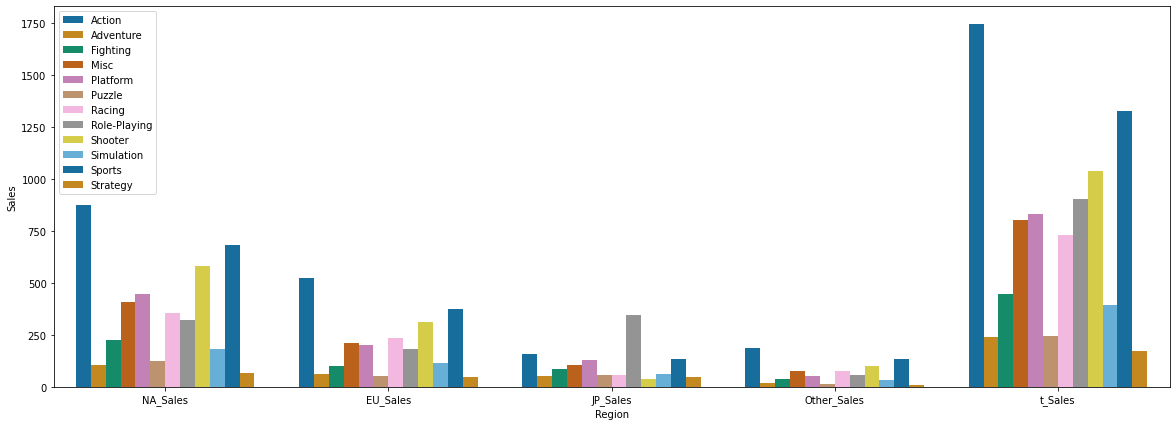

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_sales,x='Region',y='Sales',hue='Genre', palette='colorblind')
plt.legend(loc='upper left')
plt.show()

위의 barplot은 북미,유럽,일본,기타지역의 각 장르별 총 판매량과 전체 총 판매량을 나타낸 그래프이다.

위의 그래프를 해석해보면 북미, 유럽, 기타지역에서는 Action장르가 가장 판매량이 높지만,
일본에서는 롤플레잉이 가장판매량이 높음을 알 수 있다.

전체적으로는 Action, Sports 순으로 판매량이 높음을 알 수 있다.

## **1-2.장르별 평균 판매량(지역별)**

In [ ]:
genre_mean=df.groupby(['Genre'])['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','t_Sales'].mean()
genre_mean.reset_index(inplace=True)
genre_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,t_Sales
0,Action,0.264693,0.157991,0.047776,0.056415,0.526874
1,Adventure,0.082547,0.050039,0.040586,0.013133,0.186305
2,Fighting,0.263518,0.119504,0.103117,0.043259,0.529398
3,Misc,0.235323,0.122468,0.060709,0.042699,0.461200
4,Platform,0.505023,0.228066,0.147794,0.058292,0.939174
5,Puzzle,0.213408,0.087768,0.098391,0.021661,0.421228
6,Racing,0.287361,0.190748,0.045374,0.062027,0.585511
7,Role-Playing,0.215469,0.123790,0.232603,0.038409,0.610270
8,Shooter,0.444893,0.239335,0.029266,0.078479,0.791972
9,Simulation,0.211514,0.131040,0.073642,0.036393,0.452590


In [ ]:
#그래프를 한눈에 시각화하기위해 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','t_Sales'를 하나로 묶기
df_mean=genre_mean.melt(id_vars='Genre')
df_mean.rename(columns={'variable':'Region','value':'mean_Sale'},inplace=True)
df_mean.head()

,Genre,Region,mean_Sale
0,Action,NA_Sales,0.264693
1,Adventure,NA_Sales,0.082547
2,Fighting,NA_Sales,0.263518
3,Misc,NA_Sales,0.235323
4,Platform,NA_Sales,0.505023


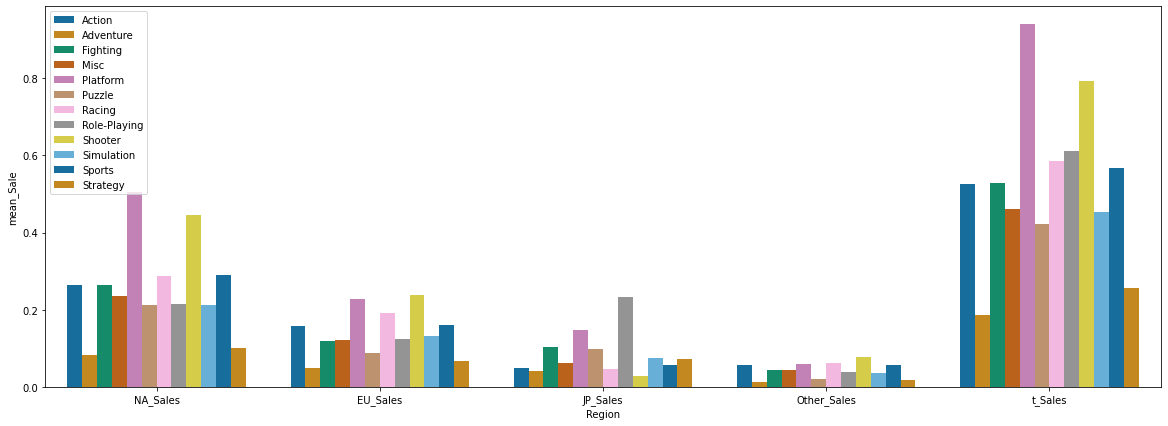

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_mean,x='Region',y='mean_Sale',hue='Genre', palette='colorblind')
plt.legend(loc='upper left')
plt.show()

위의 barplot은 북미,유럽,일본,기타지역의 각 장르별 평균 판매량과 전체 평균 판매량을 나타낸 그래프이다.

그래프를 해석해보면 북미와 유럽에서는 Platform,Shooter 장르가 평균 판매량이 높고,
일본에서는 롤플레잉과 Platform 이 평균 판매량이 높다.

기타 지역에서는 Shooter가 가장 평균 판매량이 높다.

전체적으로는 Platform,Shooter 순으로 평균 판매량이 높다.

## **1-3.장르별 판매량 검정**

In [ ]:
chi2=pd.crosstab(df_mean['Region'],df_mean['Genre'],values=df_mean['mean_Sale'],aggfunc='sum')
chi2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Region,,,,,,,,,,,,
EU_Sales,0.157991,0.050039,0.119504,0.122468,0.228066,0.087768,0.190748,0.123790,0.239335,0.131040,0.160820,0.066647
JP_Sales,0.047776,0.040586,0.103117,0.060709,0.147794,0.098391,0.045374,0.232603,0.029266,0.073642,0.057826,0.072735
NA_Sales,0.264693,0.082547,0.263518,0.235323,0.505023,0.213408,0.287361,0.215469,0.444893,0.211514,0.290696,0.101029
Other_Sales,0.056415,0.013133,0.043259,0.042699,0.058292,0.021661,0.062027,0.038409,0.078479,0.036393,0.057527,0.016706
t_Sales,0.526874,0.186305,0.529398,0.461200,0.939174,0.421228,0.585511,0.610270,0.791972,0.452590,0.566869,0.257118


In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(chi2)

(0.4698150467807865,
 1.0,
 44,
 array([[0.13971845, 0.04940495, 0.14038763, 0.12230255, 0.24905359,
         0.11170285, 0.15526787, 0.16183351, 0.2100181 , 0.12001933,
         0.15032432, 0.06818338],
        [0.0840716 , 0.02972802, 0.08447426, 0.07359207, 0.1498609 ,
         0.06721401, 0.09342802, 0.09737871, 0.12637241, 0.07221821,
         0.09045338, 0.04102741],
        [0.25937615, 0.09171633, 0.26061842, 0.22704491, 0.46234809,
         0.20736742, 0.2882424 , 0.30043099, 0.38988183, 0.2228063 ,
         0.27906509, 0.126577  ],
        [0.04370824, 0.01545539, 0.04391758, 0.03826001, 0.07791163,
         0.03494409, 0.04857257, 0.05062651, 0.06570013, 0.03754574,
         0.04702608, 0.02132986],
        [0.52687443, 0.18630469, 0.52939787, 0.46119954, 0.93917421,
         0.42122837, 0.58551086, 0.61026972, 0.79197248, 0.4525896 ,
         0.56686886, 0.25711765]]))



*   귀무가설:지역과 게임 장르별 평균 판매량은 연관이 없다.
*   대립가설:지역과 게임 장르별 평균 판매량은 연관이 없지는 않다.
*   pvalue>0.05이므로 귀무가설 채택. =>지역과 게임 장르별 평균 판매량은 연관이 없다.






In [ ]:
chi3=pd.crosstab(df_sales['Region'],df_sales['Genre'],values=df_sales['Sales'],aggfunc='sum')
chi3

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Region,,,,,,,,,,,,
EU_Sales,522.16,64.05,101.22,212.36,201.61,50.73,237.10,183.58,313.05,113.35,376.48,45.32
JP_Sales,157.90,51.95,87.34,105.27,130.65,56.87,56.40,344.95,38.28,63.70,135.37,49.46
NA_Sales,874.81,105.66,223.20,408.05,446.44,123.35,357.19,319.54,581.92,182.96,680.52,68.70
Other_Sales,186.45,16.81,36.64,74.04,51.53,12.52,77.10,56.96,102.65,31.48,134.67,11.36
t_Sales,1741.32,238.47,448.40,799.72,830.23,243.47,727.79,905.03,1035.90,391.49,1327.04,174.84


In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(chi3)

(696.7959761665388,
 2.4821948321842943e-118,
 44,
 array([[ 475.6200157 ,   65.13513033,  122.47491273,  218.43362447,
          226.76705352,   66.50081847,  198.78683483,  247.19774815,
          282.94326963,  106.93065028,  362.46455886,   47.75538301],
        [ 251.09725564,   34.38722495,   64.65899974,  115.31912416,
          119.71864709,   35.10822183,  104.94686312,  130.50476034,
          149.37613254,   56.45261331,  191.35833857,   25.21181872],
        [ 858.96895075,  117.63393614,  221.18948701,  394.49075948,
          409.54091837,  120.10036664,  359.00869034,  446.43871862,
          510.99507046,  193.11657509,  654.61038546,   86.24614163],
        [ 155.6337779 ,   21.31370858,   40.07660052,   71.47649189,
           74.20338101,   21.76059306,   65.04761171,   80.88877289,
           92.58552738,   34.99016132,  118.6067171 ,   15.62665663],
        [1741.32      ,  238.47      ,  448.4       ,  799.72      ,
          830.23      ,  243.47      ,  727.79  

*   귀무가설:지역과 게임 장르별 총 판매량은 연관이 없다.
*   대립가설:지역과 게임 장르별 총 판매량은 연관이 없지는 않다.
*   pvalue<0.05이므로 대립가설 채택. =>지역과 게임 장르별 총 판매량은 연관이 없지않다. => 총 판매량 기준으로 결론 내자

## **1-4.결론: 지역에 따라서 선호하는 게임 장르가 다를까?**

**게임 장르별 총 판매량 기준**
```
북미(NA): 1)Action 2)Sport 3)Shooter
유럽(EU): 1)Action 2)Sport 3)Shooter
일본(JP): 1)Role-Playing 2)Action 3)Sport
기타지역(Other): 1)Action 2)Sport 3)Shooter
```

**북미,유럽,기타지역**


```
선호하는 장르가 동일.
'Action', 'Sport', 'Shooter' 순으로 인기.
```

**일본**


```
'Role-Playing', 'Action', 'Sport' 순으로 인기.
```



#**2.연도별 게임의 트렌드가 있을까?**

## **2-1.연도별 게임 장르별 판매량**
연도별로 출시된 게임장르별 판매량을 살펴보자자

In [ ]:
def toint(str):
  return int(str)

In [ ]:
df_year=df.groupby(['Year','Genre']).sum()
df_year.reset_index(inplace=True)
df_year['Year']=df_year['Year'].apply(toint)
df_year

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,t_Sales
0,1980,Action,0.32,0.02,0.00,0.00,0.34
1,1980,Fighting,0.72,0.04,0.00,0.01,0.77
2,1980,Misc,2.53,0.15,0.00,0.02,2.70
3,1980,Shooter,6.56,0.43,0.00,0.08,7.07
4,1981,Action,13.86,0.81,0.00,0.12,14.79
...,...,...,...,...,...,...,...
383,2016,Sports,4.57,7.36,0.78,1.92,14.63
384,2016,Strategy,0.11,0.32,0.05,0.04,0.52
385,2017,Action,0.00,0.00,0.01,0.00,0.01
386,2017,Role-Playing,0.00,0.00,0.04,0.00,0.04


In [ ]:
genre_years=pd.crosstab(df_year['Year'],df_year['Genre'],values=df_year['t_Sales'],aggfunc='sum').fillna(0)
genre_years['sum']=genre_years.sum(axis=1) #총액
genre_years.head(11)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,sum
Year,,,,,,,,,,,,,
1980,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.00,0.0,10.88
1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.0,35.68
1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.0,28.88
1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.0,16.80
1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.0,50.35
1985,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.04,1.96,0.0,53.95
1986,13.74,0.00,0.00,0.00,9.39,0.00,1.96,2.52,3.89,0.00,5.58,0.0,37.08
1987,1.11,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.69,0.00,3.71,0.0,21.70
1988,1.74,0.00,0.00,0.00,27.73,5.58,2.14,5.88,0.51,0.03,3.60,0.0,47.21


In [ ]:
#총액/본인값
#for i in genre_years.columns:
 # genre_years[i]=genre_years[i]/genre_years['sum']
#genre_years=genre_years.drop('sum',axis=1)
#genre_years.head(11)

In [ ]:
#총액/본인값
for i in genre_years.columns:
  genre_years[i]=genre_years[i]/genre_years['sum']
genre_years=genre_years.drop('sum',axis=1)
genre_years=genre_years.T
genre_years.reset_index(inplace=True)
genre_years

Year,Genre,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
0,Action,0.031250,0.414518,0.225069,0.170238,0.036743,0.065246,0.370550,0.051152,0.036857,0.063308,0.129431,0.209742,0.050433,0.039356,0.019566,0.040631,0.103658,0.137216,0.154446,0.110852,0.168155,0.172484,0.219885,0.190474,0.183906,0.186497,0.129232,0.173808,0.200263,0.207738,0.198711,0.231050,0.333628,0.354071,0.293711,0.260665,0.280090,0.2,0.0
1,Adventure,0.000000,0.000000,0.000000,0.023810,0.000000,0.000000,0.000000,0.201843,0.000000,0.000000,0.000000,0.069500,0.160757,0.001522,0.047210,0.008058,0.021034,0.024718,0.035427,0.030543,0.014687,0.027266,0.028091,0.005940,0.020842,0.018602,0.022313,0.040078,0.036827,0.031043,0.028023,0.030833,0.016293,0.018692,0.018066,0.030592,0.025540,0.0,0.0
2,Fighting,0.070772,0.000000,0.000000,0.000000,0.000000,0.019462,0.000000,0.249770,0.000000,0.000000,0.000000,0.012101,0.200026,0.190259,0.106917,0.168426,0.090776,0.058686,0.124153,0.057433,0.100526,0.055080,0.063237,0.066657,0.040476,0.042917,0.043790,0.028911,0.052350,0.048330,0.025164,0.042929,0.026318,0.020445,0.047909,0.029714,0.054325,0.0,0.0
3,Misc,0.248162,0.000000,0.030125,0.127381,0.028798,0.000000,0.000000,0.000000,0.000000,0.017427,0.000000,0.002482,0.064880,0.006523,0.036102,0.072523,0.053641,0.028249,0.046400,0.082999,0.077156,0.049877,0.039663,0.066657,0.075253,0.133309,0.130671,0.151326,0.127408,0.115493,0.149499,0.108283,0.063323,0.072562,0.070395,0.044533,0.016227,0.0,0.0
4,Platform,0.000000,0.193946,0.174169,0.412500,0.013704,0.800185,0.253236,0.080184,0.587376,0.281280,0.465465,0.236736,0.176123,0.406175,0.363040,0.189422,0.142052,0.108718,0.116902,0.083480,0.079637,0.119686,0.116604,0.119978,0.114328,0.049743,0.096599,0.058264,0.052705,0.061501,0.054083,0.054598,0.051255,0.070950,0.026313,0.023107,0.029350,0.0,0.0
5,Puzzle,0.000000,0.063061,0.347645,0.046429,0.062363,0.059500,0.000000,0.000000,0.118195,0.513955,0.121329,0.100527,0.063567,0.068928,0.019313,0.030530,0.019725,0.029194,0.024885,0.005378,0.019004,0.024162,0.013526,0.004791,0.020311,0.044182,0.020972,0.038996,0.022959,0.030458,0.018856,0.009902,0.004805,0.002828,0.004479,0.002635,0.000000,0.0,0.0
6,Racing,0.000000,0.013453,0.054363,0.000000,0.118173,0.000000,0.052859,0.000000,0.045329,0.000000,0.126595,0.035371,0.118860,0.007828,0.027518,0.069118,0.140140,0.158751,0.104950,0.149262,0.099236,0.169897,0.076509,0.146203,0.110150,0.122994,0.066200,0.063872,0.104567,0.051198,0.059072,0.067898,0.039850,0.036818,0.049570,0.030249,0.023564,0.0,0.0
7,Role-Playing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067961,0.214286,0.124550,0.029952,0.091554,0.101148,0.090097,0.121548,0.090003,0.161957,0.221356,0.108519,0.110083,0.189597,0.144091,0.067010,0.114421,0.084870,0.130292,0.062173,0.100661,0.071924,0.088245,0.072029,0.119328,0.103526,0.131921,0.086361,0.136132,0.139136,0.095245,0.8,0.0
8,Shooter,0.649816,0.280830,0.131925,0.029167,0.617676,0.018536,0.104908,0.031797,0.010803,0.016201,0.000000,0.061744,0.003677,0.066971,0.104772,0.047100,0.034720,0.110210,0.038406,0.049085,0.033889,0.075500,0.120892,0.075932,0.113314,0.090653,0.074538,0.116233,0.087979,0.104890,0.130963,0.192898,0.201154,0.177389,0.195758,0.252530,0.256385,0.0,0.0
9,Simulation,0.000000,0.012332,0.000000,0.000000,0.000000,0.000741,0.000000,0.000000,0.000635,0.000000,0.022888,0.066708,0.028106,0.004131,0.034335,0.047327,0.057012,0.047944,0.027864,0.045995,0.016721,0.059463,0.027457,0.059428,0.026300,0.107467,0.042235,0.080107,0.068597,0.050387,0.037307,0.029765,0.036922,0.024545,0.016434,0.021426,0.005503,0.0,1.0


In [ ]:
#2017과 2020은 데이터가 매우 적어 삭제
genre_years=genre_years.drop(2017,axis=1)
genre_years=genre_years.drop(2020,axis=1)

In [ ]:
genre_years=genre_years.melt(id_vars='Genre')

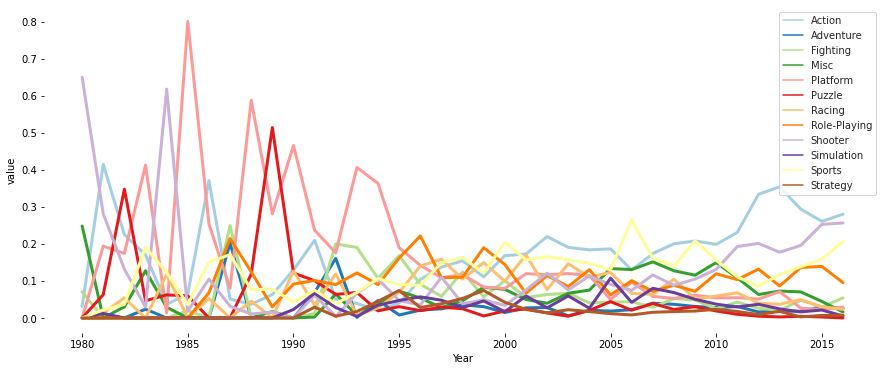

In [ ]:

fig,ax=plt.subplots(figsize=(15,6))
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True) #테두리 제거
sns.lineplot(x='Year',y='value',hue='Genre',data=genre_years,palette='Paired', lw=3)
plt.legend(loc='upper right')
plt.show()



*   1980~1990에는 Action,Shooter,Platform,Puzzle이 인기가 많았고 특히 Platform 장르가 인기가 많았다.
*   1990~2000에도 마찬가지로 Platfome,Puzzle 장르가 인기가 많았다.
*   2000~2010에는 대체적으로 장르별 인기도가 비슷했다.
*   2010년도 이후에는 Action, Shooter 장르가 인기가 많았다.
*   2017년도 이후의 데이터는 매우 적어 고려하지않는다.



## **2-2.연도별 게임 플랫폼 선호도(회사)**
데이터에 존재하는 플랫폼의 종류는 총 31가지로 이를 다 분석하기는 어려우므로 데이터전처리단계에서 진행했던 플랫폼의 용도(가정용/휴대용)와 회사에 따라 선호도를 확인해본다.

In [ ]:
df_com=df.groupby(['Year','P_Company']).sum()
df_com.reset_index(inplace=True)
df_com['Year']=df_com['Year'].apply(toint)

In [ ]:
genre_com=pd.crosstab(df_com['Year'],df_com['P_Company'],values=df_com['t_Sales'],aggfunc='sum').fillna(0)
genre_com['sum']=genre_com.sum(axis=1) #총액

#총액/본인값
for i in genre_com.columns:
  genre_com[i]=genre_com[i]/genre_com['sum']
genre_com=genre_com.drop('sum',axis=1)
genre_com=genre_com.T
genre_com.reset_index(inplace=True)

#2017과 2020은 데이터가 매우 적어 삭제
genre_com=genre_com.drop(2017,axis=1)
genre_com=genre_com.drop(2020,axis=1)

genre_com=genre_com.melt(id_vars='P_Company')
genre_com

,P_Company,Year,value
0,3DO,1980,0.000000
1,Atari,1980,1.000000
2,Bandai,1980,0.000000
3,Microsoft,1980,0.000000
4,Nec,1980,0.000000
...,...,...,...
365,Nintendo,2016,0.138705
366,PC,2016,0.036687
367,SNK,2016,0.000000
368,Sega,2016,0.000000


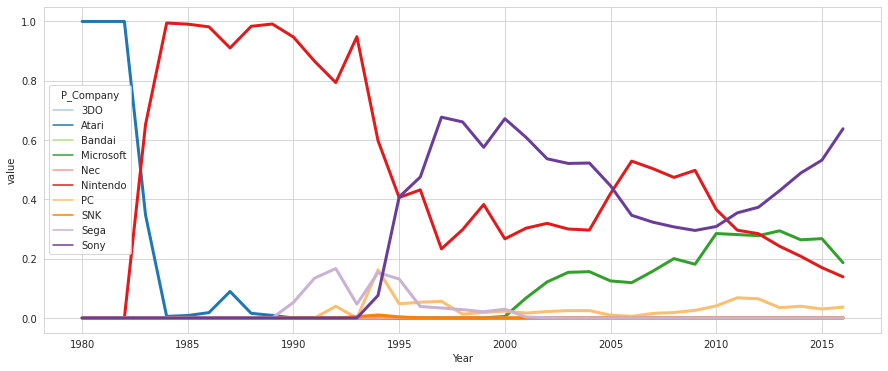

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Year',y='value',hue='P_Company',data=genre_com,palette='Paired', lw=3)



*   1980년대 초반에는 Atari회사의 플랫폼이 매출을 독점하였으나 Nintendo사가 들어오면서 급격히 하락하였다.
*   NES가 출시된 1983년 이후 닌텐도사가 10년동안 플랫폼을 거의 독점하였다.
*   1994년 소니에서 플레이스테이션이 출시된 이후 소니가 닌텐도사를 앞질렀다.
*   2001년도 마이크로소프트에서 XBox를 출시하여 조금씩 파이를 늘려가 2010년에는 닌텐도,소니,마이크로소프트 3사가 비슷한 매출을 기록하였다.
*   2010년 이후에는 다시 소니가 앞서고있고 그 뒤를 마이크로소프트가 따라가고있다.



**추가적으로 소니사의 플랫폼과 마이크로소프트사의 플랫폼들 중 최근 가장 판매량이 높은 플랫폼이 무엇인지 확인해보자.**

In [ ]:
df_p=df.groupby(['Year','Platform']).sum()
df_p.reset_index(inplace=True)
df_p['Year']=df_p['Year'].apply(toint)
df_p=df_p[df_p['Platform'].isin(['XB','X360','Xone'])]

In [ ]:
genre_p=pd.crosstab(df_p['Year'],df_p['Platform'],values=df_p['t_Sales'],aggfunc='sum').fillna(0)
genre_p['sum']=genre_p.sum(axis=1) #총액

#총액/본인값
for i in genre_p.columns:
  genre_p[i]=genre_p[i]/genre_p['sum']
genre_p=genre_p.drop('sum',axis=1)
genre_p=genre_p.T
genre_p.reset_index(inplace=True)


genre_p=genre_p.melt(id_vars='Platform')

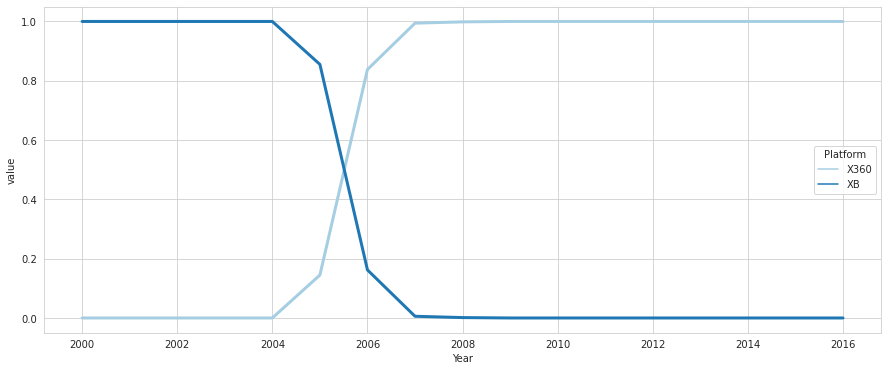

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Year',y='value',hue='Platform',data=genre_p,palette='Paired', lw=3)

In [ ]:
df_p2=df.groupby(['Year','Platform']).sum()
df_p2.reset_index(inplace=True)
df_p2['Year']=df_p2['Year'].apply(toint)
df_p2=df_p2[df_p2['Platform'].isin(['PSP','PSV','PS','PS2','PS3','PS4'])]

In [ ]:
genre_p2=pd.crosstab(df_p2['Year'],df_p2['Platform'],values=df_p2['t_Sales'],aggfunc='sum').fillna(0)
genre_p2['sum']=genre_p2.sum(axis=1) #총액

#총액/본인값
for i in genre_p2.columns:
  genre_p2[i]=genre_p2[i]/genre_p2['sum']
genre_p2=genre_p2.drop('sum',axis=1)
genre_p2=genre_p2.T
genre_p2.reset_index(inplace=True)

#2017은 데이터가 매우 적어 삭제
genre_p2=genre_p2.drop(2017,axis=1)

genre_p2=genre_p2.melt(id_vars='Platform')
genre_p2

,Platform,Year,value
0,PS,1994,1.000000
1,PS2,1994,0.000000
2,PS3,1994,0.000000
3,PS4,1994,0.000000
4,PSP,1994,0.000000
...,...,...,...
133,PS2,2016,0.000000
134,PS3,2016,0.056379
135,PS4,2016,0.868892
136,PSP,2016,0.000000


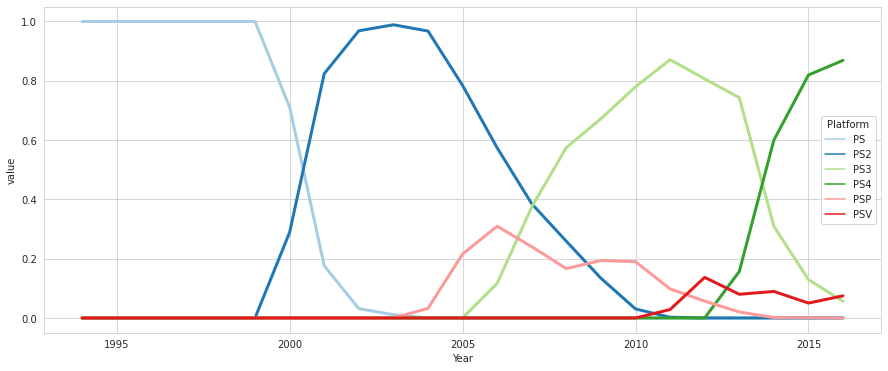

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Year',y='value',hue='Platform',data=genre_p2,palette='Paired', lw=3)

최근기준 소니사의 주력 상품은 PS3,PS4이고 마이크로소프트사의 주력 상품은 X360임을 확인할 수 있다.

## **2-3.연도별 게임 플랫폼 선호도(용도)**

In [ ]:
df_com2=df.groupby(['Year','Use']).sum()
df_com2.reset_index(inplace=True)
df_com2['Year']=df_com2['Year'].apply(toint)

KeyError: ignored

In [ ]:
genre_com2=pd.crosstab(df_com2['Year'],df_com2['Use'],values=df_com2['t_Sales'],aggfunc='sum').fillna(0)
genre_com2['sum']=genre_com2.sum(axis=1) #총액

#총액/본인값
for i in genre_com2.columns:
  genre_com2[i]=genre_com2[i]/genre_com2['sum']
genre_com2=genre_com2.drop('sum',axis=1)
genre_com2=genre_com2.T
genre_com2.reset_index(inplace=True)

#2017과 2020은 데이터가 매우 적어 삭제
genre_com2=genre_com2.drop(2017,axis=1)
genre_com2=genre_com2.drop(2020,axis=1)

genre_com2=genre_com2.melt(id_vars='Use')
genre_com2.head(30)

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Year',y='value',hue='Use',data=genre_com2,palette='Paired', lw=3)



*   1980년도 후반까지는 가정용 플랫폼이 시장 전체를 차지하였다.
*   1980년도 후반 휴대용 플랫폼이 등장하면서 잠시 시장 전체를 차지하였지만 90년대에 들어서면서 다시 가정용 플랫폼이 우위를 차지했다.
*   2005년도쯤 닌텐도DS 등의 휴대용 플랫폼이 탄생하면서 휴대용 플랫폼의 인기가 늘었지만 최근 다시 가정용 플랫폼의 점유율이 계속해서 늘어나고있다.


#**3.매출이 높은 게임에 대한 분석**

## **3-1.최고매출 게임 분석**
2010년 이후 최고 매출을 기록한 게임 15개에 대해 분석해보자 대해 분석

In [ ]:
df_best=df[(df['Year']>=2010)].sort_values(by='t_Sales',ascending=False)
df_best=df_best[:15]
df_best

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,t_Sales,P_Company
4343,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,Microsoft
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,Sony
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,Microsoft
10621,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,Nintendo
2809,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,Microsoft
6248,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,Microsoft
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79,14.35,Nintendo
9070,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,Sony
4240,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.04,Sony
6393,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.74,Microsoft


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


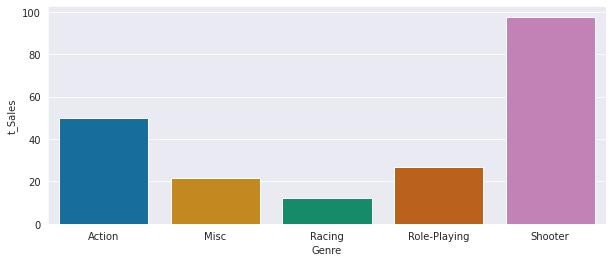

In [ ]:
genre=df_best.groupby(['Genre'])['Genre','t_Sales'].sum()
genre.reset_index(inplace=True)
plt.figure(figsize=(10,4))
sns.set_style("darkgrid")
sns.despine(left=True, bottom=True) #테두리 제거
sns.barplot(data=genre,x='Genre',y='t_Sales', palette='colorblind')


분석 결과 장르로는 Shooter,Action 순으로 판매량이 높은것을 알 수 있다.

In [ ]:
plat=df_best.groupby(['Platform'])['Platform','t_Sales'].sum()
plat.reset_index(inplace=True)
plt.figure(figsize=(10,4))
sns.set_style("darkgrid")
sns.despine(left=True, bottom=True) #테두리 제거
sns.barplot(data=plat,x='Platform',y='t_Sales', palette='colorblind')

플랫폼으로는 X360,PS3,3DS,PS4 순으로 판매량이 높은 것을 알 수 있다

#**4.성공 확률 분석**

최근 10년간 최고매출 게임을 분석한 결과



```
장르: Shooter,Action
플랫폼: X360,PS3,3DS,PS4
```
가 매출이 높다는 것을 알 수 있었다.

이를 통해 어떤 게임들이 최고매출을 기록했는지는 알 수 있었지만, 각 항목별로 얼마나 많은 게임이 나왔고 그 중 몇프로가 성공한것인지는 알 수 없다.

하단에서는 베이지안 이론을 통해 각 장르,플랫폼별로 사용시 성공 확률을 구해본다.





In [ ]:
data2010=df[(df['Year']>=2010)].sort_values(by='t_Sales',ascending=False)
sns.scatterplot(x = 'Year', y = 't_Sales', data = data2010);

매출이 1M(100만장)을 기록하는 경우 성공이라 가정하자.

## **4-1.장르별 성공확률 분석**

>최근 10년간 Shooter, Action 장르에 대한 성공확률을 분석해보자.



In [ ]:
df2010=df[(df['Year']>=2010)]
df411=df2010[df2010['Genre'].isin([ 'Shooter'])]
df412=df411[df411['t_Sales']>=1]
print('Shooter 장르의 성공 확률: ',len(df412)/len(df411))

In [ ]:
df413=df2010[df2010['Genre'].isin([ 'Action'])]
df414=df413[df413['t_Sales']>=1]
print('Action 장르의 성공 확률: ',len(df414)/len(df413))

Shooter 장르가 Action 장르보다 성공 확률이 2배 이상 높다. 따라서 Shooter 장르를 채택한다.

## **4-2.플랫폼별 성공확률 분석**

>최근 10년간 Shooter장르에 대한 플랫폼 X360,PS3,3DS,PS4의 성공확률을 분석해보자.

PS3와 PS4은 같은 회사이므로 같이 묶는다



In [ ]:
df421=df413[df413['Platform'].isin([ 'PS3','PS4'])]
df422=df421[df421['t_Sales']>=1]
print('Shooter 장르애 대한 PS3,PS4 플랫폼의 성공 확률: ',len(df422)/len(df421))

In [ ]:
df423=df413[df413['Platform'].isin([ '3DS'])]
df424=df423[df423['t_Sales']>=1]
print('Shooter 장르애 대한 3DS 플랫폼의 성공 확률: ',len(df424)/len(df423))

In [ ]:
df425=df413[df413['Platform'].isin([ 'X360'])]
df426=df425[df425['t_Sales']>=1]
print('Shooter 장르애 대한 X360 플랫폼의 성공 확률: ',len(df426)/len(df425))

 Shooter장르에 대한 플랫폼의 성공 확률은 X360, PS3+PS4, 3DS 순으로 높다

## **4-3.Publisher별 성공확률 분석**

>최근 10년간 Shooter장르이고 플랫폼 X360,PS3,PS4인 게임에 대한 Publisher별 성공확률을 분석해보자.



In [ ]:
plat2=df425.groupby(['Publisher'])['Publisher','t_Sales'].sum()
plat2.sort_values(by='t_Sales',ascending=False).head(2)

Shooter장르이고 플랫폼 X360인 경우 'Take-Two Interactive','Ubisoft'순으로 판매량이 높다.

이중 성공확률이 가장 높은 케이스를 찾아보자.

In [ ]:
df431=df425[df425['Publisher'].isin([ 'Ubisoft'])]
df432=df431[df431['t_Sales']>=1]
print('Shooter장르이고 X360플랫폼인 Publisher:Ubisoft의 성공 확률: ',len(df432)/len(df431))

In [ ]:
df435=df425[df425['Publisher'].isin([ 'Take-Two Interactive'])]
df436=df435[df435['t_Sales']>=1]
print('Shooter장르이고 X360플랫폼인 Publisher:Take-Two Interactive의 성공 확률: ',len(df436)/len(df435))

In [ ]:
plat2=df421.groupby(['Publisher'])['Publisher','t_Sales'].sum()
plat2.sort_values(by='t_Sales',ascending=False).head(2)

Shooter장르이고 플랫폼 PS3,PS4인 경우 'Take-Two Interactive','Ubisoft'순으로 판매량이 높다.

이중 성공확률이 가장 높은 케이스를 찾아보자.

In [ ]:
df437=df421[df421['Publisher'].isin([ 'Ubisoft'])]
df438=df437[df437['t_Sales']>=1]
print('Shooter장르이고 PS3,PS4플랫폼인 Publisher:Ubisoft의  성공 확률: ',len(df438)/len(df437))

In [ ]:
df439=df421[df421['Publisher'].isin([ 'Take-Two Interactive'])]
df430=df439[df439['t_Sales']>=1]
print('Shooter장르이고 PS3,PS4플랫폼인 Publisher:Take-Two Interactive의  성공 확률: ',len(df430)/len(df439))

이중 성공확률이 가장 높은 케이스는

*   Shooter장르이고 X360플랫폼인 Publisher:Take-Two Interactive
*   Shooter장르이고 PS3,PS4플랫폼인 Publisher:Take-Two Interactive

이다.

#**5.결론**

최근 10년간 100만장 이상 판매한 게임의 조합을 살펴본 결과,



*    Publisher:Take-Two Interactive
*    Platform: X360(마이크로소프트,Xbox)
*    Genre: Shooter

인 케이스가 가장 높은 확률로 성공할 수 있다는 결론이 나왔다.

만약 해당 케이스가 불가능할경우 2안으로는

*    Publisher:Take-Two Interactive
*    Platform:  PS3,PS4(소니,플레이스테이선)
*    Genre: Shooter

이 있다.

